In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
from scipy import stats
import env
from acquire import get_connection
from acquire import get_titanic_data
from acquire import get_iris_data
from acquire import get_telco_data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
def get_summary(df):
    '''
    get all the descriptive information needed from a given dataframe and print the results
    
    return none
    '''
    print(f'First Three Rows of Dataframe:')
    print(f'{df.head(3)}\n')
    print(f'Number of Rows and Columns in Dataframe:')
    print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}\n')
    print(f'Column Names from Dataframe:')
    print(f'{df.columns}\n')
    print('Data types from Dataframe:')
    print(f'{df.dtypes}\n')
    print('Summary of numeric variables:')
    print(f'{df.describe()}\n')

# Exercises I

### 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables

In [3]:
df_iris = data('iris')

In [4]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [5]:
df_iris.shape

(150, 5)

In [6]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [7]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [8]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# the smarter way, not the harder way
get_summary(df_iris)

First Three Rows of Dataframe:
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa

Number of Rows and Columns in Dataframe:
Rows: 150, Columns: 5

Column Names from Dataframe:
Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

Data types from Dataframe:
Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

Summary of numeric variables:
       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100

### 5. Read the data from this google sheet into a dataframe, df_google.

- print the first 3 rows
- rint the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [10]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [11]:
df_google = pd.read_csv(csv_export_url)

In [12]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [13]:
df_google.shape

(891, 12)

In [14]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df_google.nunique()[df_google.dtypes == 'object']

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [18]:
# The smarter way
get_summary(df_google)

First Three Rows of Dataframe:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  

Number of Rows and Columns in Dataframe:
Rows: 891, Columns: 12

Column Names from Dataframe:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data types from Dataframe:
PassengerId      in

### 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [19]:
df_excel = pd.read_excel('/Users/jay/codeup-data-science/Classification/classification-exercises/train.xlsx')

In [20]:
df_excel_sample = df_excel.head(100)

In [21]:
df_excel.shape[0]

891

In [22]:
df_excel_sample.columns[0:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [23]:
df_excel_sample.dtypes[df_excel_sample.dtypes == 'object']

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [24]:
max_num = df_excel_sample.describe().max()

In [25]:
min_num = df_excel_sample.describe().min()

In [26]:
range = max_num - min_num
range

PassengerId     99.000000
Survived       100.000000
Pclass          99.183503
Age             77.170000
SibSp          100.000000
Parch          100.000000
Fare           255.775000
dtype: float64

## Make a new python module, acquire.py to hold the following data aquisition functions:
### 1.Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [27]:
get_titanic_data()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


### 2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [28]:
get_iris_data().head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


### 3. Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join contract_types, internet_service_types, payment_types tables with the customers table, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

In [29]:
get_telco_data().head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


### 4. Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [30]:
get_titanic_data?

Signature: get_titanic_data()
Docstring:
get_titanic_data will determine if 'titanic.csv' exists, if it does, it will load the dataframe titanic_db,
if it does not exist, it will write the dataframe titanic_db into a .csv
File:      ~/codeup-data-science/Classification/classification-exercises/acquire.py
Type:      function

In [31]:
get_iris_data?

Signature: get_iris_data()
Docstring:
get_iris_data will determine if 'iris.csv' exists, if it does, it will load the dataframe iris_db,
if it does not exist, it will write the dataframe iris_db into a .csv
File:      ~/codeup-data-science/Classification/classification-exercises/acquire.py
Type:      function

In [32]:
get_telco_data?

Signature: get_telco_data()
Docstring:
get_telco_data will determine if 'telco.csv' exists, if it does, it will load the dataframe telco_churn,
if it does not exist, it will write the dataframe telco_churn into a .csv
File:      ~/codeup-data-science/Classification/classification-exercises/acquire.py
Type:      function

Done!

# Exercises II

## Using the Iris Data:

### 1. Use the function defined in acquire.py to load the iris data.

In [33]:
iris = get_iris_data()

In [34]:
# attempting to work smarter

def dropped(df,columns={'sepal_length', 'petal_width'}):
    '''
    dropped will take the dataframe and remove any columns that are indicated,
    hopefully making the process faster
    '''
    iris = df.drop(columns=columns)
    return df

### 2. Drop the species_id and measurement_id columns.

In [37]:
iris = dropped(iris, columns={'species_id', 'measurement_id'})

In [38]:
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


### 3. Rename the species_name column to just species.

In [39]:
iris = iris.rename(columns={'species_name':'species'})

In [40]:
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


### 4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [41]:
dummy_df = pd.get_dummies(iris[['species']], drop_first = True).astype(int)

In [42]:
iris = pd.concat([iris,dummy_df], axis=1)
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,1,1,5.1,3.5,1.4,0.2,setosa,0,0
1,1,2,4.9,3.0,1.4,0.2,setosa,0,0
2,1,3,4.7,3.2,1.3,0.2,setosa,0,0
3,1,4,4.6,3.1,1.5,0.2,setosa,0,0
4,1,5,5.0,3.6,1.4,0.2,setosa,0,0


### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [4]:
iris = get_iris_data()

def dropped(iris,columns={'sepal_length', 'petal_width'}):
    '''
    dropped will take the dataframe and remove any columns that are indicated,
    hopefully making the process faster
    '''
    iris = iris.drop(columns=columns)
    return iris

def prep_iris(iris):
    '''
    prep_iris will do all the cleaning we need of the database 'iris_db'.
    It will:
    - drop unnecessary columns ('species_id', 'measurement_id')
    - rename 'species_name' to 'species'
    - create dummy variables for the species name 
    - concatenate the previous dataframe to the new one with dummy variables
    
    return: concatenated and cleaned dataframe 'iris_db' as 'df'
    '''
    iris = get_iris_data()
    iris = dropped(iris, columns={'species_id', 'measurement_id'})
    iris = iris.rename(columns={'species_name':'species'})
    dummy_df = pd.get_dummies(iris[['species']], drop_first=True).astype(int)
    iris = pd.concat([iris,dummy_df], axis=1)
    return iris

In [44]:
prep_iris(iris).head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


## Using the Titanic dataset:

### 1. Use the function defined in acquire.py to load the Titanic data.

In [45]:
titanic = get_titanic_data()

### 2. Drop any unnecessary, unhelpful, or duplicated columns.

In [46]:
titanic.isna().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [47]:
titanic = dropped(titanic,columns={'deck', 'embark_town', 'pclass'})

In [48]:
round(titanic['age'].mean())
top_embarked = titanic['embarked'].describe()['top']
titanic['embarked'] = titanic['embarked'].fillna(value='top_embarked')
titanic['age'] = titanic['age'].fillna(value='30')

In [49]:
top_embarked = titanic['embarked'].describe()['top']

In [50]:
titanic['embarked'] = titanic['embarked'].fillna(value='top_embarked')

In [51]:
titanic['age'] = titanic['age'].fillna(value='30')

In [52]:
titanic.isna().sum()

passenger_id    0
survived        0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
alone           0
dtype: int64

### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [53]:
titanic['age'] = titanic['age'].astype(int)

In [54]:
titanic.dtypes[titanic.dtypes == 'object']

sex         object
embarked    object
class       object
dtype: object

In [55]:
dummy_sex_df = pd.get_dummies(titanic[['sex']], drop_first=True).astype(int)
dummy_embarked_df = pd.get_dummies(titanic[['embarked']], drop_first=True).astype(int)
dummy_class_df = pd.get_dummies(titanic[['class']], drop_first=True).astype(int)
titanic = pd.concat([titanic, dummy_sex_df, dummy_embarked_df, dummy_class_df], axis=1)
titanic.head()

,passenger_id,survived,sex,age,sibsp,parch,fare,embarked,class,alone,sex_male,embarked_Q,embarked_S,embarked_top_embarked,class_Second,class_Third
0,0,0,male,22,1,0,7.2500,S,Third,0,1,0,1,0,0,1
1,1,1,female,38,1,0,71.2833,C,First,0,0,0,0,0,0,0
2,2,1,female,26,0,0,7.9250,S,Third,1,0,0,1,0,0,1
3,3,1,female,35,1,0,53.1000,S,First,0,0,0,1,0,0,0
4,4,0,male,35,0,0,8.0500,S,Third,1,1,0,1,0,0,1


### 4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [5]:
titanic = get_titanic_data()

def dropped(titanic,columns={'sepal_length', 'petal_width'}):
    '''
    dropped will take the dataframe and remove any columns that are indicated,
    hopefully making the process faster
    '''
    titanic = titanic.drop(columns=columns)
    return titanic

def prep_titanic(titanic):
    '''
    prep_titanic will do all the cleaning we need of the database 'titanic_db'.
    It will:
    - drop unnecessary columns ('deck', 'embark_town', 'pclass')
    - fill in null values from columns (embarked' and 'age')
    - create dummy variables for the categorical columns 'sex', 'embarked', and 'class'
    - concatenate the previous dataframe to the new ones with dummy variables
    
    return: concatenated and cleaned dataframe 'titanic_db' as 'df'
    '''
    titanic = dropped(titanic,columns={'deck', 'embark_town', 'pclass'})
    round(titanic['age'].mean())
    top_embarked = titanic['embarked'].describe()['top']
    titanic['embarked'] = titanic['embarked'].fillna(value='top_embarked')
    titanic['age'] = titanic['age'].fillna(value='30')
    dummy_sex_df = pd.get_dummies(titanic[['sex']], drop_first=True).astype(int)
    dummy_embarked_df = pd.get_dummies(titanic[['embarked']], drop_first=True).astype(int)
    dummy_class_df = pd.get_dummies(titanic[['class']], drop_first=True).astype(int)
    titanic = pd.concat([titanic, dummy_sex_df, dummy_embarked_df, dummy_class_df], axis=1)
    return titanic

In [57]:
prep_titanic(titanic).head()

,passenger_id,survived,sex,age,sibsp,parch,fare,embarked,class,alone,sex_male,embarked_Q,embarked_S,embarked_top_embarked,class_Second,class_Third
0,0,0,male,22.0,1,0,7.2500,S,Third,0,1,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,0,0,0,0,0,0,0
2,2,1,female,26.0,0,0,7.9250,S,Third,1,0,0,1,0,0,1
3,3,1,female,35.0,1,0,53.1000,S,First,0,0,0,1,0,0,0
4,4,0,male,35.0,0,0,8.0500,S,Third,1,1,0,1,0,0,1


## Using the Telco dataset:

### 1. Use the function defined in acquire.py to load the Telco data.

In [58]:
telco = get_telco_data()

### 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [59]:
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [60]:
telco['internet_service_type'] = telco['internet_service_type'].fillna(value='No Internet')

In [61]:
telco = dropped(telco,columns={'payment_type_id', 'internet_service_type_id', 'contract_type_id'})

### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [62]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [63]:
telco['senior_citizen'] = telco['senior_citizen'].astype(object)

In [64]:
telco['total_charges'] = telco['total_charges'].replace(' ','0').astype(float)

In [65]:
telco.dtypes[telco.dtypes == 'object']

customer_id              object
gender                   object
senior_citizen           object
partner                  object
dependents               object
phone_service            object
multiple_lines           object
online_security          object
online_backup            object
device_protection        object
tech_support             object
streaming_tv             object
streaming_movies         object
paperless_billing        object
churn                    object
contract_type            object
internet_service_type    object
payment_type             object
dtype: object

In [68]:
dummy_df = (telco[['gender', 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
      'online_security', 'online_backup', 'device_protection', 'tech_support',
      'streaming_tv', 'streaming_movies', 'churn', 'contract_type', 'internet_service_type', 'payment_type' ]])
telco = pd.concat([telco, dummy_df], axis=1)
telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies,streaming_movies,churn,churn,contract_type,contract_type,internet_service_type,internet_service_type,payment_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,No,No,No,No,One year,One year,DSL,DSL,Mailed check,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,Yes,Yes,No,No,Month-to-month,Month-to-month,DSL,DSL,Mailed check,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,Yes,Yes,Month-to-month,Month-to-month,Fiber optic,Fiber optic,Electronic check,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Month-to-month,Fiber optic,Fiber optic,Electronic check,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,No,No,Yes,Yes,Month-to-month,Month-to-month,Fiber optic,Fiber optic,Mailed check,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,No,No,No,No,One year,One year,DSL,DSL,Mailed check,Mailed check
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,Yes,Yes,Yes,Yes,Month-to-month,Month-to-month,Fiber optic,Fiber optic,Electronic check,Electronic check
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,No,No,No,No,Month-to-month,Month-to-month,DSL,DSL,Mailed check,Mailed check
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,Yes,Yes,No,No,Two year,Two year,DSL,DSL,Mailed check,Mailed check


### 4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [347]:
telco = get_telco_data()

def dropped(telco,columns={'sepal_length', 'petal_width'}):
    '''
    dropped will take the dataframe and remove any columns that are indicated,
    hopefully making the process faster
    '''
    telco = telco.drop(columns=columns)
    return telco

def prep_telco(telco):
    '''
    prep_telco will do all the cleaning we need of the database 'telco_churn'.
    It will:
    - drop unnecessary columns ('payment_type_id', 'internet_service_type_id', 'contract_type_id')
    - fill in null values from columns (embarked' and 'age')
    - create dummy variables for the many categorical columns:
      - 'gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
      - 'online_security', 'online_backup', 'device_protection', 'tech_support',
      - 'streaming_tv', 'streaming_movies', 'churn', 'contract_type', 'internet_service_type', and 'payment_type'
    - concatenate the previous dataframe to the new ones with dummy variables
    
    return: concatenated and cleaned dataframe 'telco_churn' as 'df'
    '''
    telco = dropped(telco, columns={'internet_service_type_id', 'contract_type_id', 'payment_type_id'})
    telco['gender_encoded'] = telco['gender'].map({'Female': 1, 'Male': 0})
    telco['partner_encoded'] = telco['partner'].map({'Yes': 1, 'No': 0})
    telco['dependents_encoded'] = telco['dependents'].map({'Yes': 1, 'No': 0})
    telco['phone_service_encoded'] = telco['phone_service'].map({'Yes': 1, 'No': 0})
    telco['paperless_billing_encoded'] = telco['paperless_billing'].map({'Yes': 1, 'No': 0})
    telco['churn_encoded'] = telco['churn'].map({'Yes': 1, 'No': 0})
    
    dummy_df = pd.get_dummies(telco[['multiple_lines',
                                     'online_security',
                                     'online_backup',
                                     'device_protection', 
                                     'tech_support',
                                     'streaming_tv',
                                     'streaming_movies', 
                                     'contract_type', 
                                     'internet_service_type',
                                     'payment_type']],
                                  drop_first=True)
    
    telco = pd.concat( [telco, dummy_df], axis=1 )
    
    telco['total_charges'] = telco['total_charges'].str.replace(' ', '0').astype(float)
    return telco

In [73]:
#testing the function 
prep_telco(telco)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,No,Yes,No,Yes,Yes,No,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,No,No,No,Yes,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,Yes,No,No,No,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,No,Yes,Yes,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,No,No,No,Yes,Yes,No,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,Yes,No,No,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,No,No,No,Yes,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,Yes,No,No,No,No,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,Yes,No,Yes,No,Two year,DSL,Mailed check


## Split your data

### 1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

Done.

In [189]:
#importing new function from prepare
from prepare import tvt

In [2]:
tvt?

Signature: tvt(df, target)
Docstring:
tvt will take in a DataFrame and return train, validate, and test DataFrames; stratify on whatever you decide as the target in bracketed and quotations.
For example: tvt(df,['survived']) will return the dataframe (in this case the titanic dataframe and stratify by 'survived').
return train, validate, test DataFrames.
File:      ~/codeup-data-science/Classification/classification-exercises/prepare.py
Type:      function

### 2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [186]:
iris = get_iris_data()

In [187]:
iris = prep_iris(iris)

In [188]:
train_iris, validate_iris, test_iris = tvt(iris,['species'])

In [190]:
train_iris.shape

(84, 7)

In [192]:
validate_iris.shape

(36, 7)

In [193]:
test_iris.shape

(30, 7)

### 3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [194]:
titanic = get_titanic_data()

In [195]:
titanic = prep_titanic(titanic)

In [196]:
train_titanic, validate_titanic, test_titanic = tvt(titanic,['survived'])

In [197]:
train_titanic.shape

(498, 16)

In [198]:
validate_titanic.shape

(214, 16)

In [199]:
test_titanic.shape

(179, 16)

### 4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [200]:
telco = get_telco_data()

In [201]:
telco = prep_telco(telco)

In [202]:
train_telco, validate_telco, test_telco = tvt(telco,['churn'])

In [203]:
train_telco.shape

(3943, 40)

In [204]:
validate_telco.shape

(1691, 40)

In [205]:
test_telco.shape

(1409, 40)

# Exercises III

## Part I

### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

#### 1. Acquire, prepare & split your data.

In [206]:
# acquire Iris
iris = get_iris_data()

In [207]:
# prepare Iris
iris = prep_iris(iris)

In [208]:
# split Iris
split_iris = tvt(iris,['species'])

In [209]:
x_train, y_train = train_iris.drop(columns={'species', 'species_versicolor', 'species_virginica'}), train_iris[['species']]

In [210]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
89,5.5,2.5,4.0,1.3
42,4.4,3.2,1.3,0.2
75,6.6,3.0,4.4,1.4
84,5.4,3.0,4.5,1.5
115,6.4,3.2,5.3,2.3


In [211]:
y_train.head()

,species
89,versicolor
42,setosa
75,versicolor
84,versicolor
115,virginica


#### 2. Univariate Stats

In [212]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
89,5.5,2.5,4.0,1.3
42,4.4,3.2,1.3,0.2
75,6.6,3.0,4.4,1.4
84,5.4,3.0,4.5,1.5
115,6.4,3.2,5.3,2.3


##### 2. 1. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

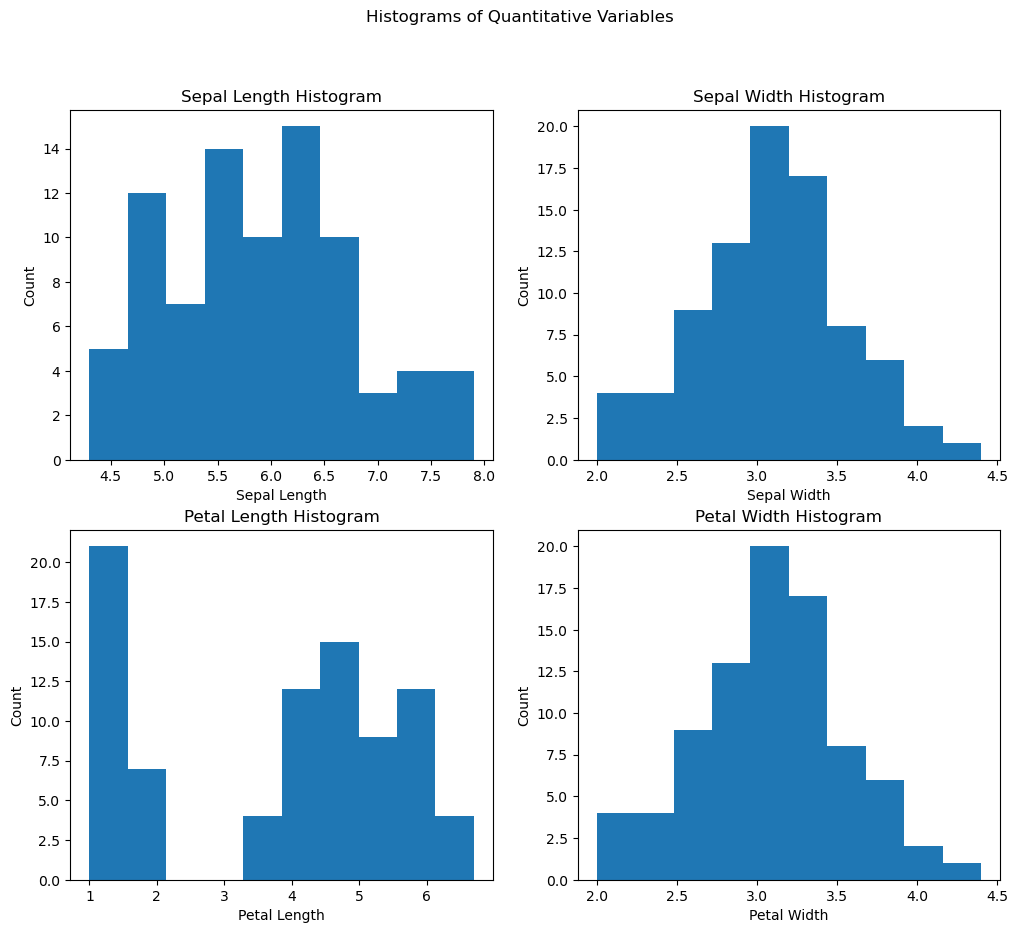

In [213]:
plt.figure(figsize=(12, 10))
plt.suptitle('Histograms of Quantitative Variables')

plt.subplot(221)
plt.hist(x = x_train['sepal_length'])
plt.title('Sepal Length Histogram')
plt.xlabel('Sepal Length')
plt.ylabel('Count')

plt.subplot(222)
plt.hist(x = x_train['sepal_width'])
plt.title('Sepal Width Histogram')
plt.xlabel('Sepal Width')
plt.ylabel('Count')

plt.subplot(223)
plt.hist(x = x_train['petal_length'])
plt.title('Petal Length Histogram')
plt.xlabel('Petal Length')
plt.ylabel('Count')

plt.subplot(224)
plt.hist(x = x_train['sepal_width'])
plt.title('Petal Width Histogram')
plt.xlabel('Petal Width')
plt.ylabel('Count')

plt.show()

In [214]:
x_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.901190,3.077381,3.776190,1.197619
std,0.854117,0.468103,1.794343,0.766305
min,4.300000,2.000000,1.000000,0.100000
25%,5.175000,2.800000,1.575000,0.300000
50%,5.850000,3.000000,4.400000,1.300000
75%,6.425000,3.400000,5.225000,1.800000
max,7.900000,4.400000,6.700000,2.500000


##### 2. 2. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

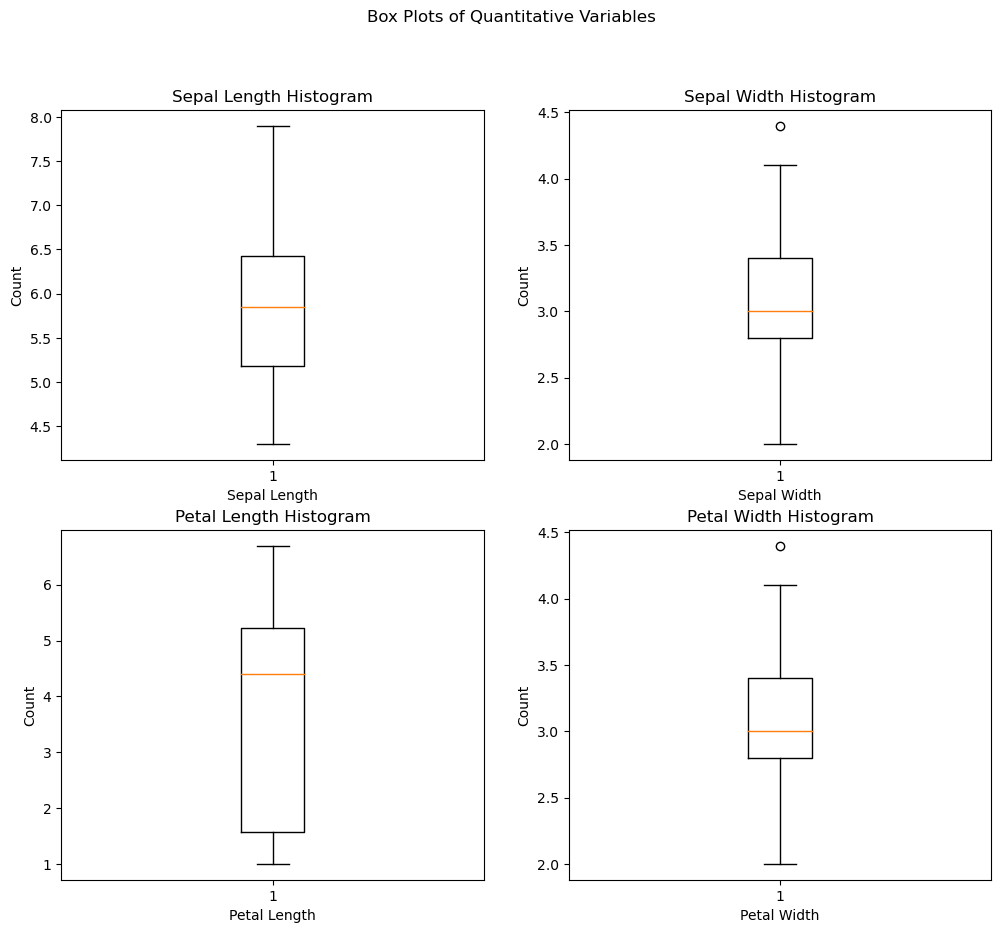

In [215]:
plt.figure(figsize=(12, 10))
plt.suptitle('Box Plots of Quantitative Variables')

plt.subplot(221)
plt.boxplot(x = x_train['sepal_length'])
plt.title('Sepal Length Histogram')
plt.xlabel('Sepal Length')
plt.ylabel('Count')

plt.subplot(222)
plt.boxplot(x = x_train['sepal_width'])
plt.title('Sepal Width Histogram')
plt.xlabel('Sepal Width')
plt.ylabel('Count')

plt.subplot(223)
plt.boxplot(x = x_train['petal_length'])
plt.title('Petal Length Histogram')
plt.xlabel('Petal Length')
plt.ylabel('Count')

plt.subplot(224)
plt.boxplot(x = x_train['sepal_width'])
plt.title('Petal Width Histogram')
plt.xlabel('Petal Width')
plt.ylabel('Count')

plt.show()

##### 2. 3. Document takeaways & any actions.

#### 3. Bivariate Stats

##### 3. 1. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

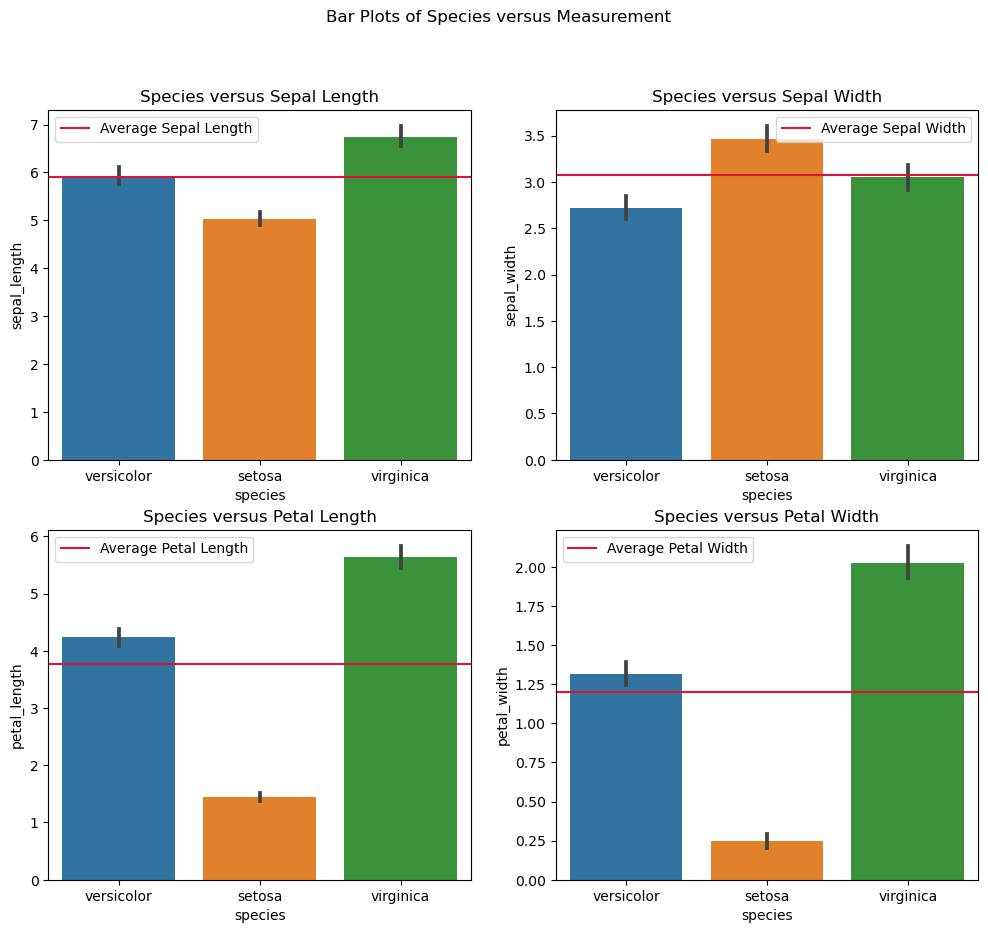

In [216]:
plt.figure(figsize=(12, 10))
plt.suptitle('Bar Plots of Species versus Measurement')

plt.subplot(221)
sns.barplot(y='sepal_length', x='species', data=train_iris)
mean_of_y = train_iris['sepal_length'].mean()
plt.axhline(mean_of_y, label="Average Sepal Length",c='crimson')
plt.title('Species versus Sepal Length')
plt.legend()

plt.subplot(222)
sns.barplot(y='sepal_width', x='species', data=train_iris)
mean_of_y = train_iris['sepal_width'].mean()
plt.axhline(mean_of_y, label="Average Sepal Width",c='crimson')
plt.title('Species versus Sepal Width')
plt.legend()

plt.subplot(223)
sns.barplot(y='petal_length', x='species', data=train_iris)
mean_of_y = train_iris['petal_length'].mean()
plt.axhline(mean_of_y, label="Average Petal Length",c='crimson')
plt.title('Species versus Petal Length')
plt.legend()

plt.subplot(224)
sns.barplot(y='petal_width', x='species', data=train_iris)
mean_of_y = train_iris['petal_width'].mean()
plt.axhline(mean_of_y, label="Average Petal Width",c='crimson')
plt.title('Species versus Petal Width')
plt.legend()
plt.show()

##### 3. 2. For each measurement type, compute the descriptive statistics for each species.

In [217]:
x_train[train_iris['species'] == 'setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.028571,3.460714,1.450000,0.246429
std,0.389546,0.365492,0.185592,0.113797
min,4.300000,2.900000,1.000000,0.100000
25%,4.775000,3.200000,1.375000,0.200000
50%,5.000000,3.450000,1.500000,0.200000
75%,5.200000,3.625000,1.525000,0.300000
max,5.800000,4.400000,1.900000,0.600000


In [218]:
x_train[train_iris['species'] == 'versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.932143,2.721429,4.242857,1.317857
std,0.468294,0.357312,0.409542,0.209149
min,5.000000,2.000000,3.300000,1.000000
25%,5.600000,2.475000,4.000000,1.175000
50%,5.950000,2.800000,4.400000,1.300000
75%,6.300000,3.000000,4.500000,1.500000
max,6.700000,3.400000,4.900000,1.800000


In [219]:
x_train[train_iris['species'] == 'virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.00000,28.000000,28.000000
mean,6.742857,3.05000,5.635714,2.028571
std,0.588424,0.35746,0.521546,0.281342
min,5.800000,2.20000,4.800000,1.400000
25%,6.275000,2.87500,5.275000,1.800000
50%,6.700000,3.00000,5.600000,2.100000
75%,7.200000,3.22500,6.025000,2.300000
max,7.900000,3.80000,6.700000,2.500000


##### 3. 3. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

H$_0$ = There is NO significant difference in the mean petal width of virginica versus versicolor.

H$_α$ = There is a significant difference in the mean petal width of virginica versus versicolor.

In [220]:
α = 0.05

In [221]:
virginica_sepal_length_mean = x_train[train_iris['species'] == 'virginica'].describe().mean()['sepal_length']
virginica_sepal_width_mean = x_train[train_iris['species'] == 'virginica'].describe().mean()['sepal_width']
virginica_petal_length_mean = x_train[train_iris['species'] == 'virginica'].describe().mean()['petal_length']
virginica_petal_width_mean = x_train[train_iris['species'] == 'virginica'].describe().mean()['petal_width']

In [222]:
versicolor_sepal_length_mean = x_train[train_iris['species'] == 'versicolor'].describe().mean()['sepal_length']
versicolor_sepal_width_mean = x_train[train_iris['species'] == 'versicolor'].describe().mean()['sepal_width']
versicolor_petal_length_mean = x_train[train_iris['species'] == 'versicolor'].describe().mean()['petal_length']
versicolor_petal_width_mean = x_train[train_iris['species'] == 'versicolor'].describe().mean()['petal_width']

In [223]:
setosa_sepal_length_mean = x_train[train_iris['species'] == 'setosa'].describe().mean()['sepal_length']
setosa_sepal_width_mean = x_train[train_iris['species'] == 'setosa'].describe().mean()['sepal_width']
setosa_petal_length_mean = x_train[train_iris['species'] == 'setosa'].describe().mean()['petal_length']
setosa_petal_width_mean = x_train[train_iris['species'] == 'setosa'].describe().mean()['petal_width']

In [224]:
t,p = stats.mannwhitneyu(virginica_petal_width_mean, versicolor_petal_width_mean)

if p < α:
    print(f' {p} < {α} \nWe reject the null hypothesis')
else:
    print(f' {p} >= {α} \nWe fail to reject the null hypothesis')

 1.0 >= 0.05 
We fail to reject the null hypothesis


In [225]:
t,p = stats.mannwhitneyu(virginica_sepal_length_mean, versicolor_sepal_length_mean)

if p < α:
    print(f' {p} < {α} \nWe reject the null hypothesis')
else:
    print(f' {p} >= {α} \nWe fail to reject the null hypothesis')

 1.0 >= 0.05 
We fail to reject the null hypothesis


In [226]:
t,p = stats.mannwhitneyu(virginica_sepal_width_mean, versicolor_sepal_width_mean)

if p < α:
    print(f' {p} < {α} \nWe reject the null hypothesis')
else:
    print(f' {p} >= {α} \nWe fail to reject the null hypothesis')

 1.0 >= 0.05 
We fail to reject the null hypothesis


In [227]:
t,p = stats.mannwhitneyu(virginica_petal_length_mean, versicolor_petal_length_mean)

if p < α:
    print(f' {p} < {α} \nWe reject the null hypothesis')
else:
    print(f' {p} >= {α} \nWe fail to reject the null hypothesis')

 1.0 >= 0.05 
We fail to reject the null hypothesis


##### 3. 4. Document takeaways & any actions.

The mean values of all criteria from versicolor and virginica are way too close to show a significant difference. This is exemplified by any graphs we make since they plot so similarly.

#### 4. Multivariate Stats

##### 4. 1. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

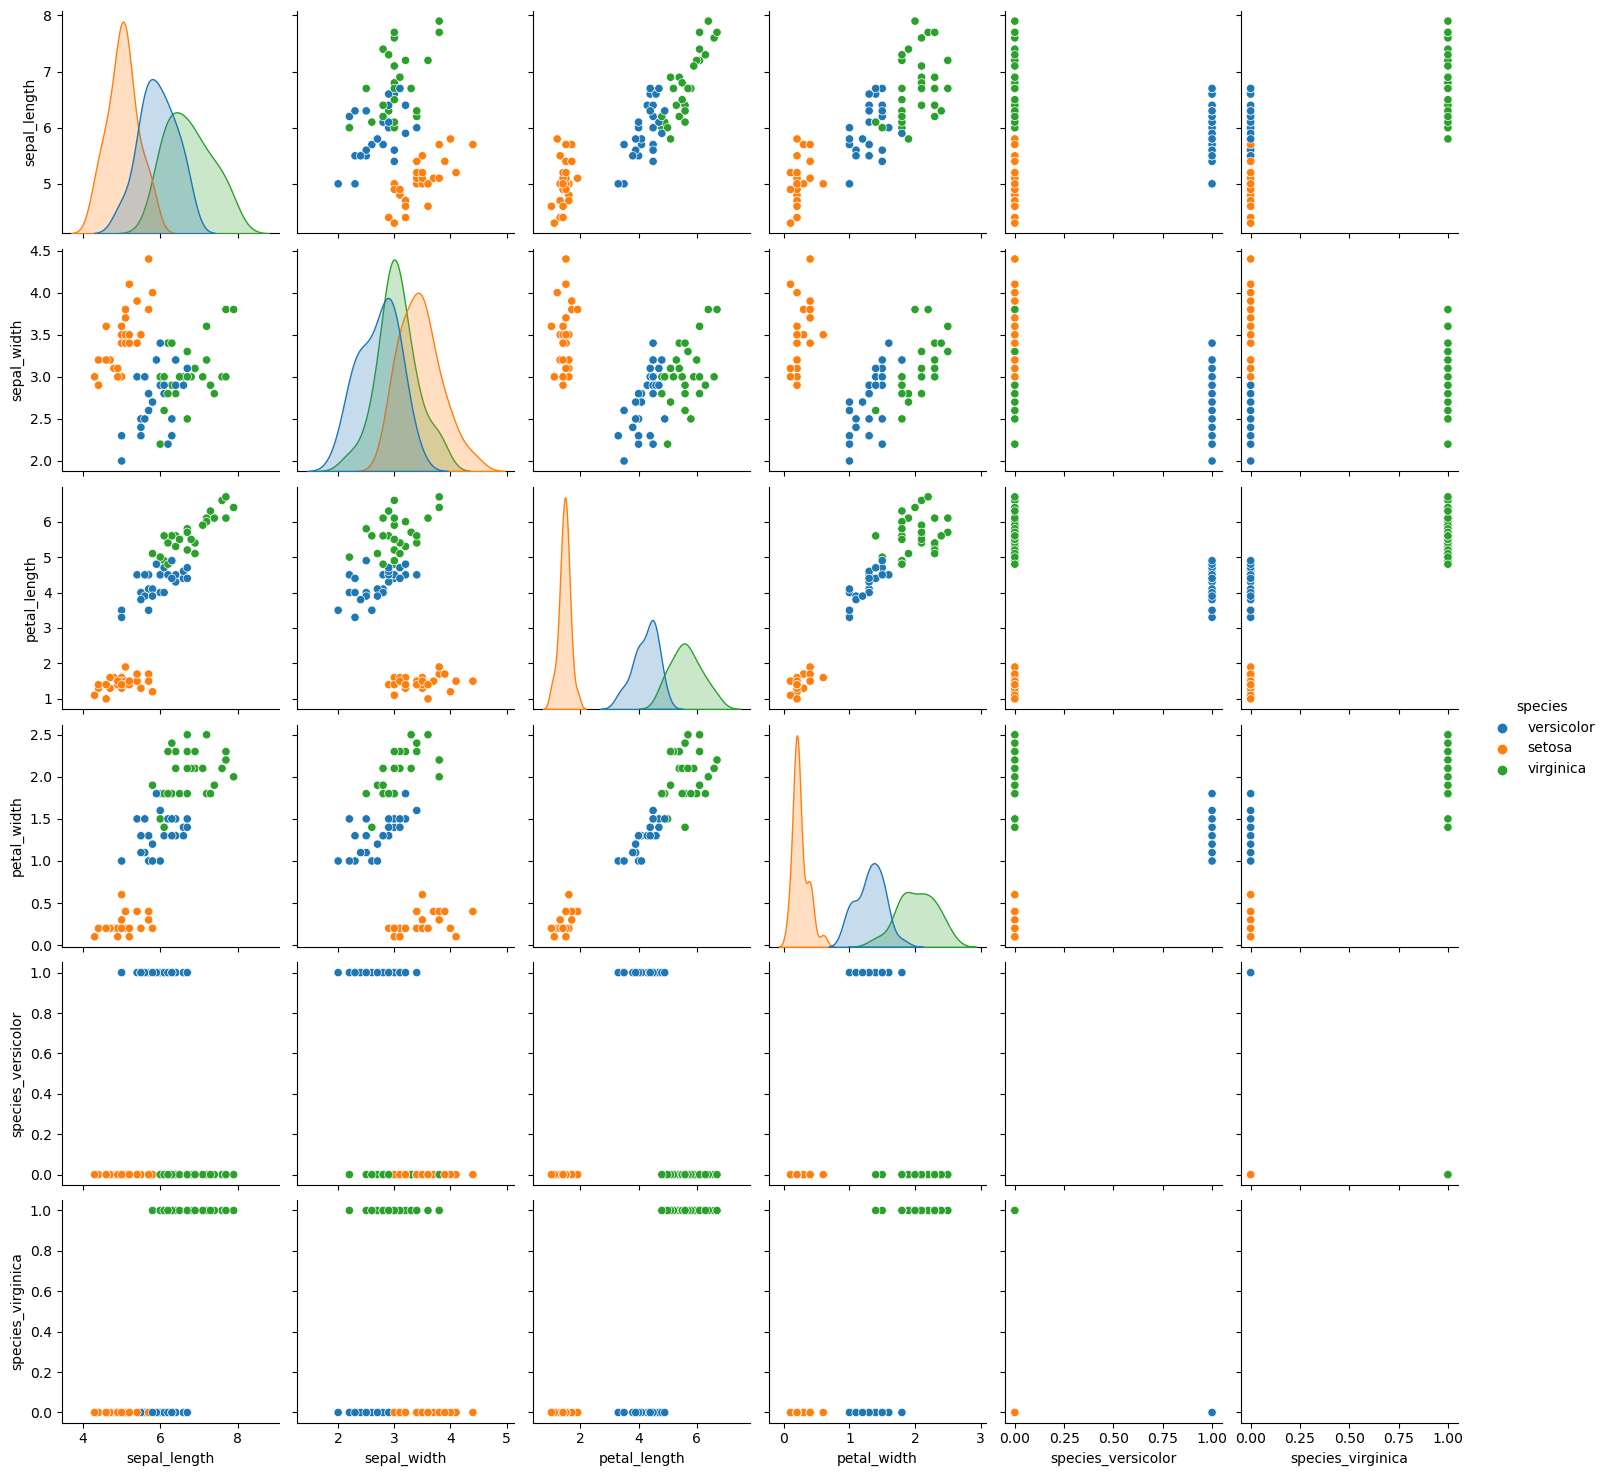

In [228]:
sns.pairplot(train_iris, hue='species')
plt.show()

##### 4. 2. Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

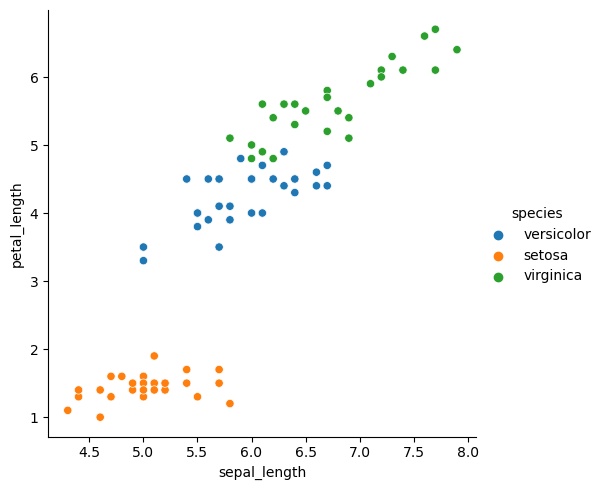

In [229]:
sns.relplot(x='sepal_length', y='petal_length', hue='species', data=train_iris)
plt.show()

##### 4. 3. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [230]:
x_train.head(1)

,sepal_length,sepal_width,petal_length,petal_width
89,5.5,2.5,4.0,1.3


In [231]:
train_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
89,5.5,2.5,4.0,1.3,versicolor,1,0


In [232]:
iris_melt = train_iris[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
iris_melt.columns = ['Species', 'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
iris_melt = iris_melt.melt(id_vars=['Species'], var_name='criteria', value_name='measurements')

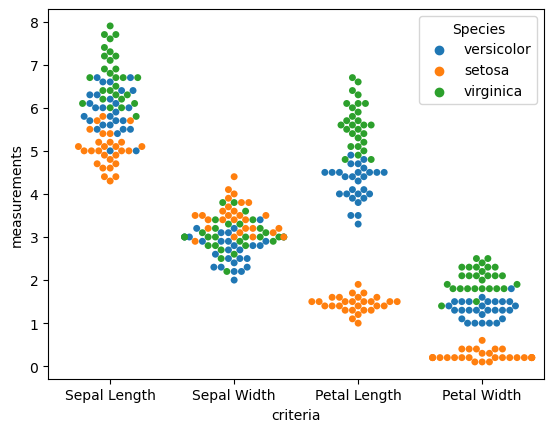

In [233]:
sns.swarmplot(data=iris_melt, x='criteria', y='measurements', hue='Species')
plt.show()

Documentation for swarm plot:
The most apparent thing for me 
(besides the fact that plotting the plants somehow made images of plants... (someone knows what they're doing up there))
is that there is a pretty clear difference on all the criteria based off of species. Setosa tends to have the smalller entries in all criteria but sepal width so we might be able to predict the species off of these criteria.

##### 4. 4. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

H$_0$ = There is NO significant difference in the average petal area of versicolor versus virginica.

H$_α$ = There is a significant difference in the average petal area of versicolor versus virginica.

In [234]:
α = 0.05

In [291]:
vir_ver_ver = train_iris[(train_iris['species'] == 'versicolor') | (train_iris['species'] == 'virginica')]
vir_ver_ver['petal_area'] = vir_ver_ver['petal_length'] * vir_ver_ver['petal_width']
vir_ver_ver['sepal_area'] = vir_ver_ver['sepal_length'] * vir_ver_ver['sepal_width']

In [292]:
vir_pet_area = vir_ver_ver[vir_ver_ver['species'] == 'virginica']['petal_area']
ver_pet_area = vir_ver_ver[vir_ver_ver['species'] == 'versicolor']['petal_area']

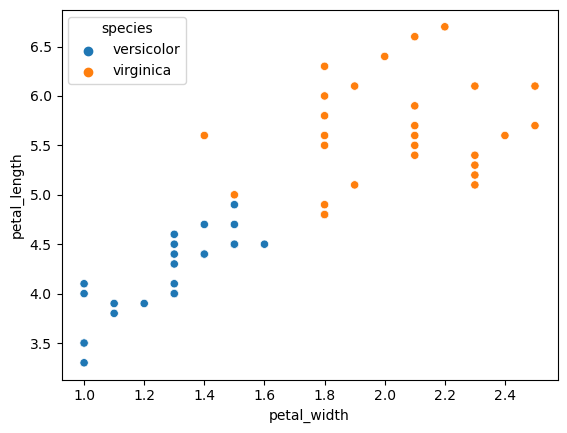

In [375]:
sns.scatterplot(y='petal_length', x='petal_width', hue="species", data=vir_ver_ver)
plt.show()

In [294]:
t,p = stats.mannwhitneyu(vir_pet_area, ver_pet_area)

if p < α:
    print(f' {p} < {α} \nWe reject the null hypothesis')
else:
    print(f' {p} >= {α} \nWe fail to reject the null hypothesis')

 1.8958018195558443e-10 < 0.05 
We reject the null hypothesis


##### 4. 5. Document takeaways and any actions.

Comparing the petal areas of virginica and versicolor, its visually apparent there's a difference between them anf the mann-whitney test confirmed there was a significant difference between them.

## Part II

### 1. Explore your titanic dataset more completely.

#### 1. 1. Determine drivers of the target variable

#### 1. 2. Determine if certain columns should be dropped

#### 1. 3. Determine if it would be valuable to bin some numeric columns

#### 1. 4. Determine if it would be valuable to combine multiple columns into one.

#### 1. 5. Does it make sense to combine any features?

#### 1. 6. Do you find any surprises?

#### 1. 7. Document any and all findings and takeaways in your notebook using markdown.

## Part III

#### 1. Explore your telco data to discover drivers of churn

In [367]:
# acquire telco
telco = get_telco_data()

In [368]:
telco = prep_telco(telco)

In [371]:
train_telco, validate_telco, test_telco = tvt(telco,['churn'])
train_telco, validate_telco, test_telco

(     customer_id  gender  senior_citizen partner dependents  tenure  \
 4993  7018-FPXHH    Male               0     Yes        Yes      56   
 190   0306-JAELE    Male               0      No         No       5   
 5071  7130-CTCUS    Male               1     Yes         No      16   
 461   0674-GCDXG    Male               0      No         No      63   
 2383  3411-WLRSQ  Female               1     Yes         No       3   
 ...          ...     ...             ...     ...        ...     ...   
 1120  1635-NZATJ    Male               1     Yes         No      71   
 1885  2737-WFVYW  Female               0      No         No       2   
 6266  8869-LIHMK  Female               0      No         No      64   
 989   1432-FPAXX  Female               0      No         No      29   
 2972  4248-QPAVC  Female               1     Yes         No      17   
 
      phone_service    multiple_lines      online_security  \
 4993           Yes                No                  Yes   
 190      

#### 1. 1. Determine if certain columns should be dropped

In [372]:
train_telco = dropped(train_telco,columns={'multiple_lines', 'online_security', 'online_backup', 'device_protection', 
                               'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'internet_service_type',
                               'payment_type', 'gender', 'partner', 'dependents'})

In [373]:
train_telco

,customer_id,senior_citizen,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,gender_encoded,partner_encoded,...,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4993,7018-FPXHH,0,56,Yes,Yes,59.80,3457.45,No,0,1,...,False,False,False,False,False,True,False,False,False,False
190,0306-JAELE,0,5,Yes,Yes,96.10,453.40,Yes,0,0,...,False,True,False,True,False,False,True,False,True,False
5071,7130-CTCUS,1,16,Yes,Yes,54.55,825.10,No,0,1,...,False,False,False,False,False,False,False,False,False,False
461,0674-GCDXG,0,63,Yes,Yes,71.90,4479.20,No,0,0,...,False,False,False,True,False,True,False,False,False,False
2383,3411-WLRSQ,1,3,Yes,Yes,74.60,239.05,No,1,1,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1635-NZATJ,1,71,Yes,No,25.45,1789.65,No,0,1,...,True,False,True,False,False,True,False,True,False,False
1885,2737-WFVYW,0,2,No,Yes,45.25,85.50,Yes,1,0,...,False,True,False,True,False,False,False,False,True,False
6266,8869-LIHMK,0,64,Yes,Yes,115.10,7334.05,No,1,0,...,False,True,False,True,False,True,True,False,False,False
989,1432-FPAXX,0,29,No,Yes,30.60,856.35,Yes,1,0,...,False,False,False,False,False,False,False,False,True,False


#### 1. 2. Determine if it would be valuable to bin some numeric columns

In [ ]:
x_train, y_train = train_iris.drop(columns={'churn', 'species_versicolor', 'species_virginica'}), train_iris[['churn']]

#### 1. 3. Determine if it would be valuable to combine multiple columns into one.

#### 1. 4. What are your drivers of churn?

#### 1. 5. Does it make sense to combine any features?

#### 1. 6. Do you find any surprises?

#### 1. 7. Document any and all findings and takeaways in your notebook using markdown.